<a href="https://colab.research.google.com/github/dhanyab123/somanyclasses/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# Image Classification

To build a convolution neural network which identifies images in the cifar100 dataset with minimum accuracy of 60% on test data and run time of training below 6 minutes.

---

In [ ]:
import os

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

In [ ]:
len(x_test)

10000

Data pre-processing

In [ ]:
len(x_train)

50000

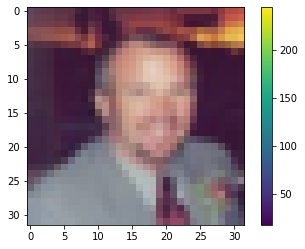

[46]


In [ ]:
# Viewing the train data and its resp. label
plt.imshow(x_train[90])
plt.colorbar()
plt.show()

print(y_train[90])

In [ ]:
# Checking the total number of possible labels
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
x_train[0].shape

(32, 32, 3)

Creating the Convolution Neural Network

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(100))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0

In [ ]:
# Adding to Loss function
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(x_train, y_train, epochs=50, batch_size=500)

Epoch 1/50
100/100 [==============================] - 56s 556ms/step - loss: 4.9510 - accuracy: 0.0148
Epoch 2/50
100/100 [==============================] - 55s 554ms/step - loss: 4.4735 - accuracy: 0.0184
Epoch 3/50
100/100 [==============================] - 56s 556ms/step - loss: 4.3739 - accuracy: 0.0234
Epoch 4/50
100/100 [==============================] - 56s 556ms/step - loss: 4.2883 - accuracy: 0.0298
Epoch 5/50
100/100 [==============================] - 55s 554ms/step - loss: 4.2201 - accuracy: 0.0400
Epoch 6/50
100/100 [==============================] - 55s 553ms/step - loss: 4.1163 - accuracy: 0.0592
Epoch 7/50
100/100 [==============================] - 55s 552ms/step - loss: 3.9467 - accuracy: 0.0824
Epoch 8/50
100/100 [==============================] - 55s 552ms/step - loss: 3.8133 - accuracy: 0.1025
Epoch 9/50
100/100 [==============================] - 55s 551ms/step - loss: 3.7011 - accuracy: 0.1239
Epoch 10/50
100/100 [==============================] - 55s 552ms/step - l

In [ ]:
# Testing the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 2.3974 - accuracy: 0.3876


[2.3974242210388184, 0.38760000467300415]

In [ ]:
# Checking size of testing dataset
len(y_test)

10000

Viewing output results

In [ ]:
distin = [i for i in range(100)]

# Predicting output for the test data
predictions = model.predict(x_test)

66


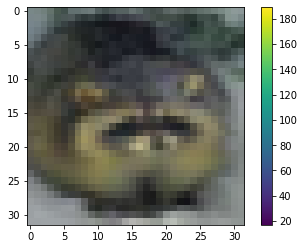

array([66])

In [ ]:
# To get the prediction for the data and the input
num = 893

print(distin[np.argmax(predictions[num])])

plt.imshow(x_test[num])
plt.colorbar()
plt.show()
y_test[num]